<a href="https://colab.research.google.com/github/Amirhossein2034/First_Script/blob/main/HW1_ML%26Apps_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1: Machine Learning & Applications**  
##This notebook demonstrates a Python data analysis project using:
- Object-Oriented Programming (OOP)
- Custom decorators
- Synthetic data generation
- Data analysis and visualization with "pandas", "numpy", and "matplotlib"

##Two main classes are implemented:
1. "DataConfig" - to generate configurable synthetic datasets.
2. "AdvancedDataAnalyzer" - to perform statistical analysis, filtering, visualization, and saving results.


In [2]:
!pip install param
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import param
from typing import Callable, Tuple

# Decorator to log execution time
def log_time(func: Callable) -> Callable:
    """Logs the execution time of a function."""
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"[{func.__name__}] executed in {(end - start):.4f} seconds.")
        return result
    return wrapper


In [3]:
class DataConfig(param.Parameterized):
    """Generates synthetic data based on configurable parameters."""
    random_seed: int = param.Integer(default=111, bounds=(1, None))
    num_samples: int = param.Integer(default=1000, bounds=(1, None))
    age: Tuple[float, float] = param.NumericTuple(default=(18.0, 80.0), length=2)
    height: Tuple[float, float] = param.NumericTuple(default=(165.0, 10.0), length=2)
    weight: Tuple[float, float] = param.NumericTuple(default=(70.0, 15.0), length=2)
    income: Tuple[float, float] = param.NumericTuple(default=(50000.0, 15000.0), length=2)
    expenditure: Tuple[float, float] = param.NumericTuple(default=(0.6, 0.1), length=2)
    gender: list = param.ListSelector(default=['Male', 'Female', 'Other'], objects=['Male', 'Female', 'Other'])
    _data: pd.DataFrame = param.DataFrame(default=pd.DataFrame())

    def __init__(self, **params):
        super().__init__(**params)
        self._generate()

    @param.depends('random_seed', 'num_samples', 'age', 'height', 'weight', 'income', 'expenditure', watch=True)
    def _generate(self, *events) -> None:
        """Generates synthetic data and updates the _data attribute."""
        print("New Data Generated!!!")
        np.random.seed(self.random_seed)
        df = pd.DataFrame({
            'age': np.random.randint(int(self.age[0]), int(self.age[1]), self.num_samples),
            'height': np.random.normal(self.height[0], self.height[1], self.num_samples),
            'weight': np.random.normal(self.weight[0], self.weight[1], self.num_samples),
            'income': np.random.normal(self.income[0], self.income[1], self.num_samples),
            'expenditure': np.random.normal(self.expenditure[0], self.expenditure[1], self.num_samples),
            'gender': np.random.choice(self.gender, self.num_samples)
        })
        self._data = df

    @log_time
    def data(self) -> pd.DataFrame:
        """Returns the generated synthetic data."""
        return self._data

    def __repr__(self):
        return str(self.param)


In [4]:
config = DataConfig(num_samples=5)
df = config.data()
print(df.head())


New Data Generated!!!
[data] executed in 0.0000 seconds.
   age      height     weight        income  expenditure  gender
0   38  160.514863  95.015974  63380.221858     0.457123   Other
1   62  172.846982  76.546949  29966.525437     0.672770  Female
2   38  152.489446  73.305399  58439.873495     0.526069   Other
3   38  159.748684  71.015099  37665.684492     0.598392    Male
4   40  176.340460  55.623279  72385.928096     0.634680  Female


In [5]:
class AdvancedDataAnalyzer:
    """Performs statistical analysis, filtering, and visualization on a DataFrame."""

    def __init__(self, df: pd.DataFrame):
        self.df = df

    @log_time
    def describe_data(self) -> pd.DataFrame:
        """Returns descriptive statistics of the dataset."""
        return self.df.describe(include='all')

    @log_time
    def filter_data(self, column: str, condition) -> pd.DataFrame:
        """Filters the data by column based on a value or callable."""
        if callable(condition):
            return self.df[self.df[column].apply(condition)]
        return self.df[self.df[column] == condition]

    @log_time
    def visualize_data(self, column: str, plot_type: str = "hist") -> None:
        """Visualizes the column using histogram, boxplot, or bar plot."""
        plt.figure(figsize=(8, 5))
        if plot_type == "hist":
            self.df[column].hist()
            plt.title(f'Histogram of {column}')
        elif plot_type == "box":
            self.df.boxplot(column=column)
            plt.title(f'Boxplot of {column}')
        elif plot_type == "bar":
            self.df[column].value_counts().plot.bar()
            plt.title(f'Bar Plot of {column}')
        else:
            print(f"Invalid plot type: {plot_type}")
            return
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    @log_time
    def save_data(self, path: str, filetype: str = "csv") -> None:
        """Saves the dataset as CSV or Parquet."""
        if filetype == "csv":
            self.df.to_csv(path, index=False)
        elif filetype == "parquet":
            self.df.to_parquet(path, index=False)
        else:
            raise ValueError("Unsupported file type")


[describe_data] executed in 0.0156 seconds.
              age      height     weight        income  expenditure gender
count    5.000000    5.000000   5.000000      5.000000     5.000000      5
unique        NaN         NaN        NaN           NaN          NaN      3
top           NaN         NaN        NaN           NaN          NaN  Other
freq          NaN         NaN        NaN           NaN          NaN      2
mean    43.200000  164.388087  74.301340  52367.646675     0.577807    NaN
std     10.545141    9.906005  14.096099  17866.436876     0.086484    NaN
min     38.000000  152.489446  55.623279  29966.525437     0.457123    NaN
25%     38.000000  159.748684  71.015099  37665.684492     0.526069    NaN
50%     38.000000  160.514863  73.305399  58439.873495     0.598392    NaN
75%     40.000000  172.846982  76.546949  63380.221858     0.634680    NaN
max     62.000000  176.340460  95.015974  72385.928096     0.672770    NaN
[filter_data] executed in 0.0007 seconds.
   age      he

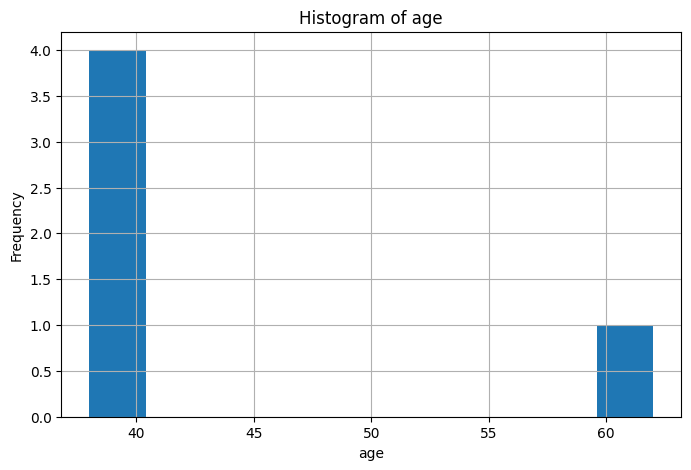

[visualize_data] executed in 0.1785 seconds.
[save_data] executed in 0.0098 seconds.


In [7]:
analyzer = AdvancedDataAnalyzer(df)

# Describe
print(analyzer.describe_data())

# Filter
filtered_df = analyzer.filter_data('gender', 'Female')
print(filtered_df.head())

# Visualize
analyzer.visualize_data('age', plot_type='hist')

# Save (optional, comment out if running in a read-only environment)
analyzer.save_data("output.csv", filetype="csv")
